In [ ]:
from google.colab import drive

In [ ]:
drive.mount(r'/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/data/alice.txt.conll', sep='\t', header=None, index_col=0)

df.head()

,1,2,3,4,5,6
0,,,,,,
1,ALICE,ALICE,NNP,_,_,_
2,'S,'s,POS,_,_,_
3,ADVENTURES,ADVENTURES,NNP,_,_,_
4,IN,in,IN,_,_,_
5,WONDERLAND,WONDERLAND,NNP,_,_,_


In [ ]:
df.iloc[0:, 0].unique()

array(['ALICE', "'S", 'ADVENTURES', ..., 'child-life', 'happy', 'END'],
      dtype=object)

In [ ]:
df.iloc[0:, 1].unique()

array(['ALICE', "'s", 'ADVENTURES', ..., 'joy', 'child-life', 'happy'],
      dtype=object)

In [ ]:
df.iloc[0:, 2].unique()

array(['NNP', 'POS', 'IN', 'DT', 'CD', 'NN', 'VBD', 'VBG', 'TO', 'VB',
       'RB', 'JJ', 'PRP$', ',', 'CC', ':', 'PRP', 'VBN', 'NNS', '``',
       'WP', 'VBZ', "''", '.', '-LRB-', 'MD', '-RRB-', 'WRB', 'EX', 'VBP',
       'UH', 'RP', 'PDT', 'WDT', 'NNPS', 'JJR', 'JJS', 'RBR', 'SYM',
       'WP$', 'FW', 'RBS'], dtype=object)

In [ ]:
a_of_b = []
for i, row in df.iterrows():
    if i + 2 < len(df):
      if df.iloc[i, 2].startswith("N") and df.iloc[i + 1, 1] == 'of' and df.iloc[i + 2, 2].startswith("N"):
        a_of_b.append(f"{df.iloc[i, 2]} {df.iloc[i + 1, 1]} {df.iloc[i + 2, 2]}")

a_of_b

[]

In [ ]:
import numpy as np
from collections import Counter

word_counts_sorted = dict(Counter(df[1]).most_common())

assert sum(word_counts_sorted.values()) == len(df)

word_counts_sorted

{',': 2418,
 'the': 1522,
 "'": 1130,
 '`': 1081,
 '.': 986,
 'and': 796,
 'to': 721,
 'a': 614,
 'I': 544,
 'it': 527,
 'she': 509,
 'of': 497,
 'said': 456,
 '!': 450,
 'Alice': 395,
 'was': 363,
 'in': 354,
 'you': 345,
 'that': 275,
 '--': 264,
 'as': 246,
 'her': 243,
 ':': 233,
 "n't": 216,
 '?': 202,
 'at': 202,
 ';': 194,
 "'s": 194,
 'on': 189,
 'had': 184,
 'with': 176,
 'all': 173,
 'be': 145,
 'for': 140,
 'but': 133,
 'not': 130,
 'they': 129,
 'very': 126,
 'little': 125,
 'so': 124,
 'do': 119,
 'this': 113,
 'out': 112,
 'The': 108,
 'is': 106,
 'he': 101,
 'down': 99,
 'up': 96,
 'about': 94,
 'one': 94,
 'his': 94,
 'what': 93,
 'them': 88,
 'were': 86,
 'know': 86,
 'like': 84,
 'went': 83,
 'again': 83,
 'herself': 83,
 'could': 82,
 'would': 82,
 'have': 81,
 'if': 78,
 'or': 76,
 'thought': 74,
 'did': 74,
 'Queen': 74,
 'then': 72,
 'no': 69,
 'when': 69,
 'into': 67,
 'And': 67,
 'see': 66,
 'time': 65,
 'there': 65,
 'It': 64,
 'off': 62,
 'me': 61,
 'King': 61

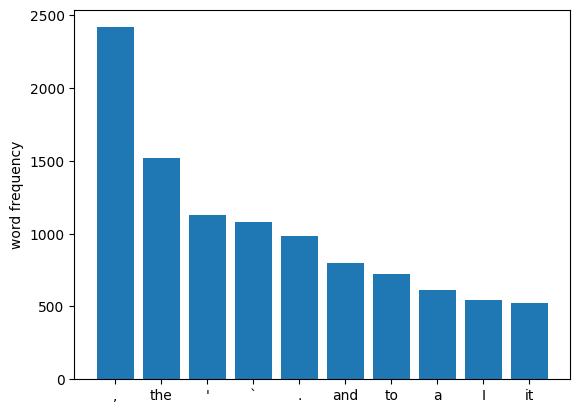

In [ ]:
import matplotlib.pyplot as plt

top_ten_freq_words = dict(Counter(df[1]).most_common(10))
plt.bar(top_ten_freq_words.keys(), top_ten_freq_words.values())
plt.ylabel('word frequency')
plt.show()

In [ ]:
co_occurent = []
n = len(df)
for i, row in df.iterrows():
    if df.iloc[i, 1].lower() == "alice":
      if i + 1 < n:
        co_occurent.append(f"{df.iloc[i, 1]} {df.iloc[i + 1, 1]}")
      if i - 1 >= 0:
        co_occurent.append(f"{df.iloc[i - 1, 1]} {df.iloc[i, 1]}")

counter = dict(Counter(co_occurent))
counter

{'Alice be': 764,
 'Rabbit-Hole Alice': 764,
 'Alice `': 22,
 'think Alice': 22,
 'Alice think': 2,
 'do Alice': 2}

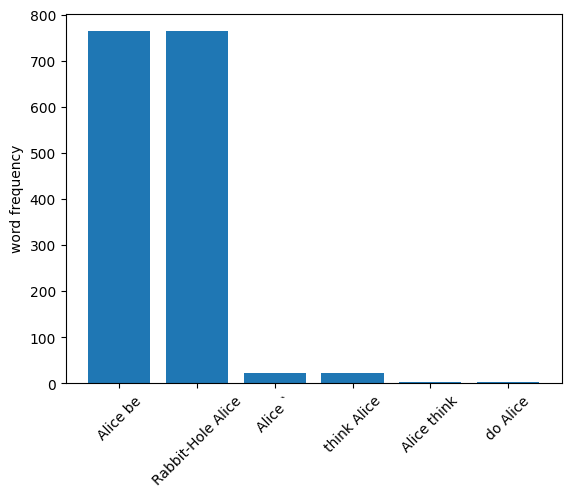

In [ ]:
plt.bar(counter.keys(), counter.values())
plt.xticks(rotation=45)
plt.ylabel("word frequency")
plt.show()

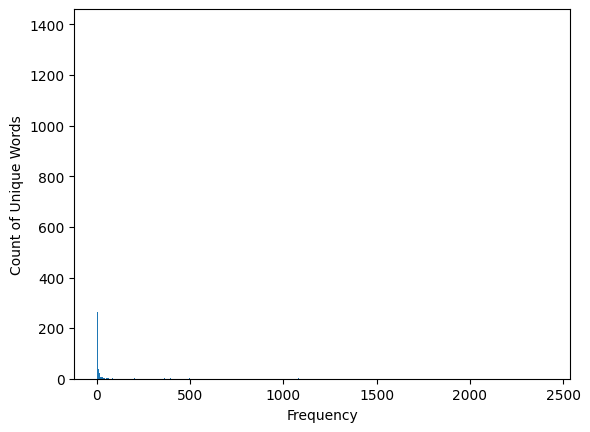

In [ ]:
counter = dict(Counter(df[1]))
assert sum(counter.values()) == len(df), "Number of words must be equal to len df"
count_unique_words = Counter(counter.values())

max_frequency = max(counter.values())

# Create a scalar range representing a frequency ranging from 1 to the largest frequency.
x = np.arange(1, max_frequency + 1)

# Create a histogram of word frequency.
plt.hist(counter.values(), bins=x)

# Set the x-axis label.
plt.xlabel("Frequency")

# Set the y-axis label.
plt.ylabel("Count of Unique Words")

# Show the plot.
plt.show()

In [ ]:
longest_noun_phrase = ''
current_noun_phrase = ''

for i, row in df.iterrows():
    if df.iloc[i, 2].startswith('N'):
        current_noun_phrase += f' {df.iloc[i, 1]}'
    else:
        if len(current_noun_phrase) > len(longest_noun_phrase):
            longest_noun_phrase = current_noun_phrase
        current_noun_phrase = ''

if len(current_noun_phrase) > len(longest_noun_phrase):
    longest_noun_phrase = current_noun_phrase

print(f'Longest noun phrase: {longest_noun_phrase}')


Longest noun phrase:  MILLENNIUM FULCRUM EDITION
